In [1]:
import CSV_to_List
from math import sqrt

In [2]:
def peak_acceleration(sample):
    maxi = 0
    for i in range(len(sample[0][0])):
            acc = sqrt(sample[0][0][i]**2 + sample[0][1][i]**2 + sample[0][2][i]**2)
            if acc > maxi:
                maxi = acc
    return maxi

In [ ]:
dataset = CSV_to_List.get_dataset(augment=False)

In [11]:
maxi = 0
maxes = []
for sample in dataset:
    if sample[1] not in ["FOL", "FKL", "BSC", "SDL"]:
        maxi = peak_acceleration(sample)
        maxes.append(maxi)
        maxi = 0

print(min(maxes))
print(max(maxes))


9.592739346162151
31.652439164226475


Text(0.5, 0, 'Acceleration peak bins')

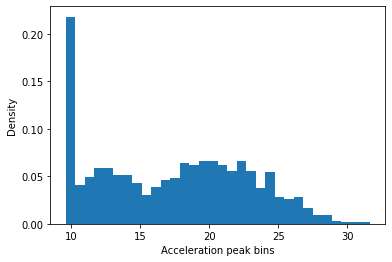

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(maxes)

plt.hist(x, density=True, bins=32)  # density=False would make counts
plt.ylabel('Density')
plt.xlabel('Acceleration peak bins')

In [17]:
TP = 0
TN = 0
FP = 0
FN = 0

threshold = 20
for sample in dataset:
    if peak_acceleration(sample) < threshold:
        if sample[1] not in ["FOL", "FKL", "BSC", "SDL"]:
            TP += 1
        else:
            FP += 1
    elif sample[1] not in ["FOL", "FKL", "BSC", "SDL"]:
            FN += 1
    else:
        TN += 1

In [18]:
specificity = float(TN) / float(TN + FP)
recall = float(TP) / float(TP + FN)
precision = float(TP) / float(TP + FP)
F1_score = 2.0/float(1.0 / float(precision) + 1.0 / float(recall))

print("Specificity : " + str(specificity))
print("Recall : " + str(recall))
print("Precision : " + str(precision))
print("F1-score : " + str(F1_score))

Specificity : 0.9817470664928292
Recall : 0.6428571428571429
Precision : 0.9893858984078847
F1-score : 0.7793371155568827
